In [77]:
import numpy as np
from scipy.stats import norm
import pandas as pd
import datetime
import time
import calendar
import matplotlib.pyplot as plt

In [78]:
def vanilla_option(S, K, T, r, sigma, option='call'):
    """
    S: spot price
    K: strike price
    T: time to maturity
    r: risk-free interest rate
    sigma: standard deviation of price of underlying asset
    """
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2 = (np.log(S/K) + (r - 0.5*sigma**2)*T)/(sigma * np.sqrt(T))

    if option == 'call':
        p = (S*norm.cdf(d1, 0.0, 1.0) - K*np.exp(-r*T)*norm.cdf(d2, 0.0, 1.0))
    elif option == 'put':
        p = (K*np.exp(-r*T)*norm.cdf(-d2, 0.0, 1.0) - S*norm.cdf(-d1, 0.0, 1.0))
    else:
        return None
    return p

In [146]:
vanilla_option(23129, 10000, 0.85, 0, 1.5, option='call')

16220.58566401778

In [129]:
BTC_df = pd.read_csv('BTC.csv')
spot_price = 23129
start_time = pd.datetime.strptime('2023-02-24', '%Y-%m-%d')
s = BTC_df['Price(USD)'].std()
print(s)
BTC_df.insert(loc=4, column='BS_price', value=0)
print(BTC_df.head())

4739.533736465831
            Unnamed: 0  Mark price  Price(USD)  Strike  BS_price
0   BTC-29DEC23-5000-C      0.7928  18336.6712    5000         0
1  BTC-29DEC23-10000-C      0.5971  13810.3259   10000         0
2  BTC-29DEC23-11000-C      0.5593  12936.0497   11000         0
3  BTC-29DEC23-12000-C      0.5231  12098.7799   12000         0
4  BTC-29DEC23-13000-C      0.4877  11280.0133   13000         0


C:\Users\omen of Hansen\AppData\Local\Temp\ipykernel_19516\2378778554.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  start_time = pd.datetime.strptime('2023-02-24', '%Y-%m-%d')


In [168]:
for idx, BTC in BTC_df.iterrows():
    date = BTC['Unnamed: 0'][4:6]
    mon = list(calendar.month_abbr).index(BTC['Unnamed: 0'][6:9].capitalize())
    Year = '20'+BTC['Unnamed: 0'][9:11]
    end_time = pd.datetime.strptime(Year+'-'+str(mon)+'-'+date, '%Y-%m-%d')
    T = end_time - start_time
    T = T.days / 365
    strike = BTC['Strike']
    print(strike)
    print(T)
    BTC_df.at[idx, 'BS_price'] = vanilla_option(spot_price, strike, T, 0, 0.6, option='call')

5000
0.8438356164383561
10000
0.8438356164383561
11000
0.8438356164383561
12000
0.8438356164383561
13000
0.8438356164383561
14000
0.8438356164383561
15000
0.8438356164383561
16000
0.8438356164383561
17000
0.8438356164383561
18000
0.8438356164383561
19000
0.8438356164383561
20000
0.8438356164383561
21000
0.8438356164383561
22000
0.8438356164383561
23000
0.8438356164383561
24000
0.8438356164383561
25000
0.8438356164383561
26000
0.8438356164383561
27000
0.8438356164383561
28000
0.8438356164383561
29000
0.8438356164383561
30000
0.8438356164383561
35000
0.8438356164383561
40000
0.8438356164383561
45000
0.8438356164383561
50000
0.8438356164383561
55000
0.8438356164383561
60000
0.8438356164383561
65000
0.8438356164383561
70000
0.8438356164383561
80000
0.8438356164383561
100000
0.8438356164383561
5000
0.5945205479452055
8000
0.5945205479452055
10000
0.5945205479452055
11000
0.5945205479452055
12000
0.5945205479452055
13000
0.5945205479452055
14000
0.5945205479452055
15000
0.5945205479452055
16

C:\Users\omen of Hansen\AppData\Local\Temp\ipykernel_19516\4272724211.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  end_time = pd.datetime.strptime(Year+'-'+str(mon)+'-'+date, '%Y-%m-%d')


In [154]:
print(BTC_df.head())
BTC_df.to_csv('BS_model.csv', index=False)

            Unnamed: 0  Mark price  Price(USD)  Strike  BS_price
0   BTC-29DEC23-5000-C      0.7928  18336.6712    5000   23129.0
1  BTC-29DEC23-10000-C      0.5971  13810.3259   10000   23129.0
2  BTC-29DEC23-11000-C      0.5593  12936.0497   11000   23129.0
3  BTC-29DEC23-12000-C      0.5231  12098.7799   12000   23129.0
4  BTC-29DEC23-13000-C      0.4877  11280.0133   13000   23129.0


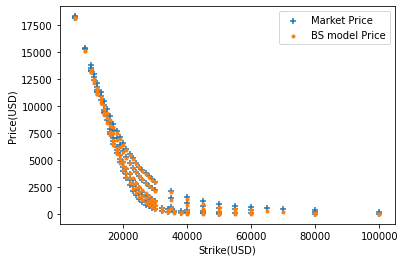

In [170]:
fig, ax = plt.subplots()
ax.set_xlabel('Strike(USD)')
ax.set_ylabel('Price(USD)')
ax.scatter(BTC_df['Strike'], BTC_df['Price(USD)'], marker='+', label='Market Price')
ax.scatter(BTC_df['Strike'], BTC_df['BS_price'], marker='.', label='BS model Price')

ax.legend()